In [1]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

import statsmodels.api as sm

import dataframe_image as dfi

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
import os

try:
    os.mkdir("../PLOTS/F_SUBAVG_RACE")
except:
    print("F_SUBAVG_RACE dir exists.")

    7
swivel = 0

#F ORDER
#swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 22, 13, 19, 11, 18, 21, 17]
swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 13, 19, 11, 18, 21, 17]

# NF ORDER
#swivel_order = [22, 2, 6, 1, 3, 0, 4, 8, 7, 15, 5, 14, 16, 9, 12, 18, 20, 17, 13, 10, 19, 21, 11]
#swivel_order = [2, 6, 1, 3, 0, 4, 8, 7, 15, 5, 14, 16, 9, 12, 18, 20, 17, 13, 10, 19, 21, 11]

desired_dir_name = "F_SUBAVG_RACE"
desired_file_prefix = "F_R" 

normalize_data=True

by_year = 1
lnconvert=False
 

# FUNCTIONS

In [3]:
def func(x, m, c):
    return (m * x) + c

In [4]:
def color_corr_green(val):
  color = 'green' if val > 0.8 else 'black'
  return 'color: %s' % color

In [5]:
def gen_boxplot():

 case_list = []

 # Create list of data cases
 #
 for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

 print(case_list)

 # Handle one case at a time
 #
 for case in case_list:
        
    #print("case = ",case)
    
    pd_df = pd.DataFrame()
    sel_y = []
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            name = name[0:5] + name[8:]
            #print("8 ",name)
            
            df = pd.DataFrame()
            df[name] = sel_y
            
            #Q1 = df[name].quantile(0.25)
            #Q3 = df[name].quantile(0.75)
            #IQR = Q3 - Q1    #IQR is interquartile range. 

            #filter = (df[name] >= Q1 - 1.5 * IQR) & (df[name] <= Q3 + 1.5 *IQR)
            #print(filter)
            #df = df.loc[filter]
            
            q = df[name].quantile(0.80)
            df = df[df[name] < q]
            
            pd_df = pd.concat([pd_df,df],axis=1)
        
            #print(pd_df)

    # Get occupation
    for code in soc_new_code:
        #print(code[0][0:2])
        if (code[0][0:2].find(case[0:2]) >= 0):
            #print(code[0],code[1])
            ocup = str(code[0]) + " " + str(code[1])
            
    #print(ocup)

    title = desired_file_prefix + " " + ocup + " boxplot " + str(case[3:])
    plt.figure(title,figsize=(10, 10))
    plt.title(title)

    #plt.ylim(0.0, 3e-6)

    pd_df.boxplot()
    plt.xticks(rotation = 90)
    plt.tight_layout()  

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    
    #print("HERE")
    #print(df[df['YEAR'].str.contains(name)])
    
    ## ########################## correlations ######################
    
    title = title + "_pearson_corr"

    df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

    df = pd_df.corr(method='pearson')
 
    df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
    save_file = "../PLOTS/" + desired_file_output + title + ".png"
    dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

    save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
    df_corr.to_excel(save_file)

    display(df_styled)        

# ALL CORRELATIONS

In [6]:
# Generate all correlations
#
def gen_corr():

  pd_df = pd.DataFrame()
  sel_y = []
    
  case_list = []

  # Create list of data cases
  #
  for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

  print(case_list)

  # Handle one case at a time
  #
  for case in case_list:
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            
            temp_pd_df = pd.DataFrame()
            temp_pd_df[name] = sel_y
            pd_df = pd.concat([pd_df,temp_pd_df],axis=1)
        
            #print(pd_df)

            # Get occupation
            for code in soc_new_code:
                #print(code[0][0:2])
                if (code[0][0:2].find(case[0:2]) >= 0):
                    #print(code[0],code[1])
                    ocup = str(code[0]) + " " + str(code[1])
            
  #print(ocup)

  title = desired_file_prefix + ocup +" ALL boxplot " + str(case[3:])
  plt.figure(title,figsize=(10, 10))
  plt.title(title)

  #plt.ylim(0.0, 3e-6)

  pd_df.boxplot()
  plt.xticks(rotation = 90)
  plt.tight_layout()  

  save_title = "../PLOTS/" + desired_file_output + title + ".png"
  save_title = save_title.replace(",","")
  save_title = save_title.replace(" ","_")
  plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
  plt.show()
    
  #print("HERE")
  #print(df[df['YEAR'].str.contains(name)])
    
  ## ########################## correlations ######################
    
  title = title + "_pearson_corr"

  df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

  df = pd_df.corr(method='pearson')
 
  df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
  save_file = "../PLOTS/" + desired_file_output + title + ".png"
  dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

  save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
  df_corr.to_excel(save_file)

  display(df_styled)        



# COLLATE THE DATA

In [7]:
lastfound = ""
pcov      = []


no_genericDB_data_dict = {}


ocovper   = []
ocov      = []
lines     = []

global_y_soc1 = []

for ocup_sel in range(1,24):
    
    print("########################################## NEW OCCUPATION ###############################################")
    print("")
    
    for year in range(0,8): 

        print("########################################## NEW YEAR ###############################################")
        
        desired_file_output = "./" + desired_dir_name + "/" + desired_file_prefix + "_" + str(2011+year) + "_"     
        
        %run ./analysis-code-subcat3-avg.ipynb

        #print(global_y_soc1)
    

########################################## NEW OCCUPATION ###############################################

########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty not found....defining
F_RWT_White_total_all.csv
F_RBT_Black_total_all.csv
F_RAT_Asian_total_all.csv
F_RHT_Hispanic_total_all.csv
F_RNT_Total_foreign_born_all.csv
F_RFT_Total_native_born_all.csv
F_RIT_American_indian_total_all.csv
F_RMT_Multiple_race_total_all.csv
F_RPT_Hawaiian_total_all.csv
dict_keys(['F_RWT_White_total', 'F_RBT_Black_total', 'F_RAT_Asian_total', 'F_RHT_Hispanic_total', 'F_RNT_Total_foreign_born', 'F_RFT_Total_native_born', 'F_RIT_American_indian_total', 'F_RMT_Multiple_race_total', 'F_RPT_Hawaiian_total'])
code_found: 11-0000:Management Occupations
*gt(adding): F_RWT_White_total_112021
*gt(adding): F_RWT_White_total_113011
*gt(adding): F_RWT_White_total_113121
*gt(adding): F_RWT_White_total_119013
*gt(adding): F_R

In [8]:
#for i in range(0,200):      #len(global_y_soc1)):
#    print(global_y_soc1[i])

# SAMPLE STRUCTURE

In [9]:
for i in range(0,10):      #len(global_y_soc1)):
    print(global_y_soc1[i])

['2011_F_RWT_White_total_111011-Management Occupations', [1.239966064086667e-06, 3.2630685897017555e-07]]
['2011_F_RWT_White_total_112021-Management Occupations', [2.6104548717614046e-07]]
['2011_F_RWT_White_total_113011-Management Occupations', [3.9156823076421064e-07, 1.9578411538210532e-07, 3.2630685897017555e-07, 3.9156823076421064e-07]]
['2011_F_RWT_White_total_113121-Management Occupations', [0]]
['2011_F_RWT_White_total_119013-Management Occupations', [1.7033218038243162e-05, 1.109443320498597e-06, 2.6104548717614046e-07, 1.3052274358807023e-07, 1.0441819487045618e-06, 3.9156823076421064e-07]]
['2011_F_RWT_White_total_119111-Management Occupations', [3.2630685897017555e-07, 7.831364615284213e-07, 3.2630685897017555e-07]]
['2011_F_RBT_Black_total_113031-Management Occupations', [0]]
['2011_F_RBT_Black_total_119013-Management Occupations', [2.1613832853025936e-06, 3.602305475504323e-06]]
['2011_F_RBT_Black_total_119141-Management Occupations', [0]]
['2011_F_RAT_Asian_total_111011-

In [10]:
print(global_y_soc1[-1])

['2018_NO DATA FOUND-Military Specific Occupations', [0]]


In [11]:
code_list = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [12]:
print( str(global_y_soc1[0][0]).split("_")[1:3]  )

ca = global_y_soc1[0][0].split("_")[1:3]
print(ca[0] + "_" + ca[1])

['F', 'RWT']
F_RWT


['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
../PLOTS/./F_SUBAVG_RACE/F_R_2018_110000_Management_Occupations_time_plots_.png


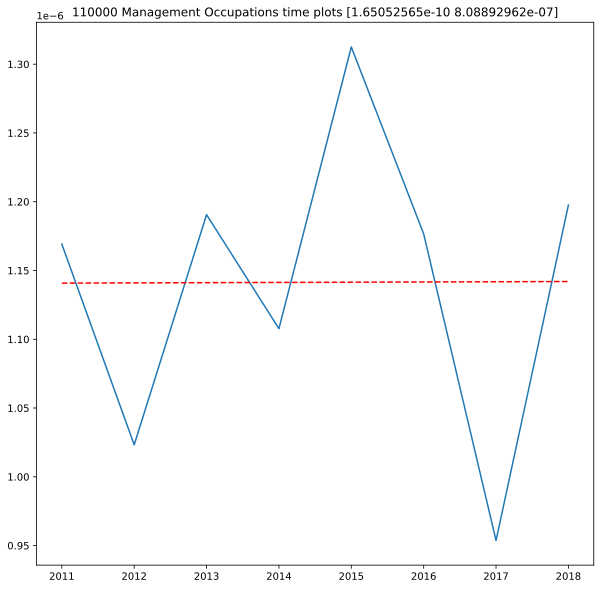

../PLOTS/./F_SUBAVG_RACE/F_R_2018_130000_Business_and_Financial_Operations_Occupations_time_plots_.png


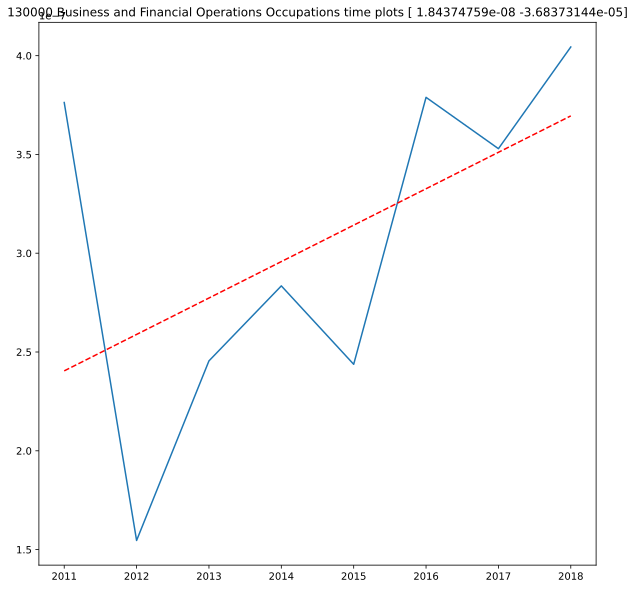

../PLOTS/./F_SUBAVG_RACE/F_R_2018_150000_Computer_and_Mathematical_Occupations_time_plots_.png


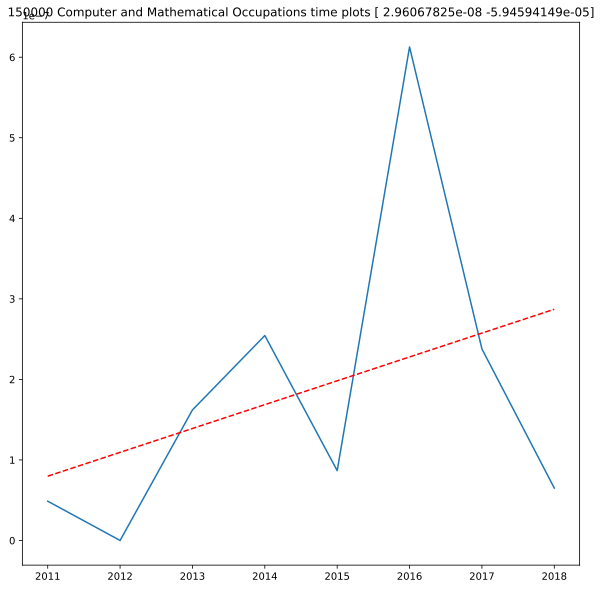

../PLOTS/./F_SUBAVG_RACE/F_R_2018_170000_Architecture_and_Engineering_Occupations_time_plots_.png


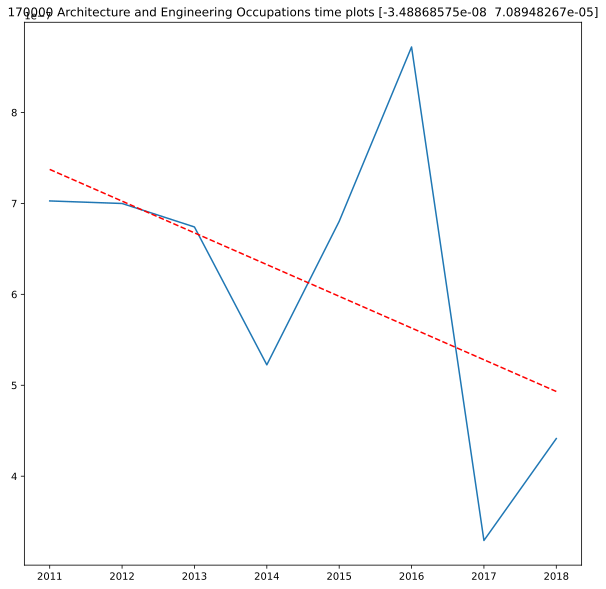

../PLOTS/./F_SUBAVG_RACE/F_R_2018_190000_Life_Physical_and_Social_Science_Occupations_time_plots_.png


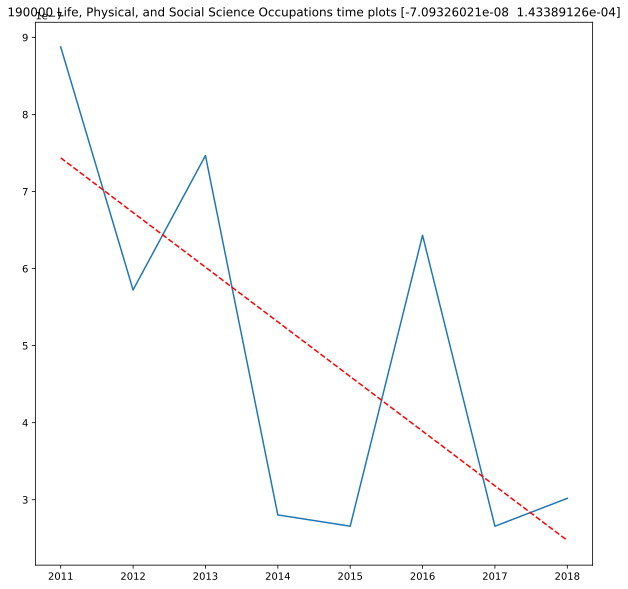

../PLOTS/./F_SUBAVG_RACE/F_R_2018_210000_Community_and_Social_Service_Occupations_time_plots_.png


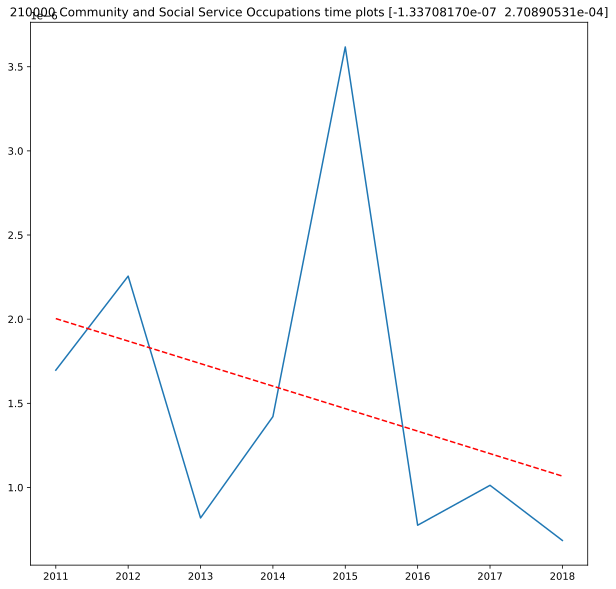

../PLOTS/./F_SUBAVG_RACE/F_R_2018_230000_Legal_Occupations_time_plots_.png


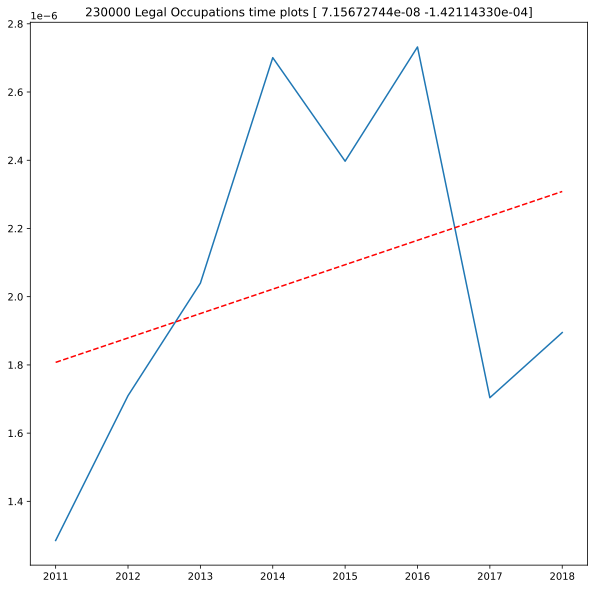

../PLOTS/./F_SUBAVG_RACE/F_R_2018_250000_Educational_Instruction_and_Library_Occupations_time_plots_.png


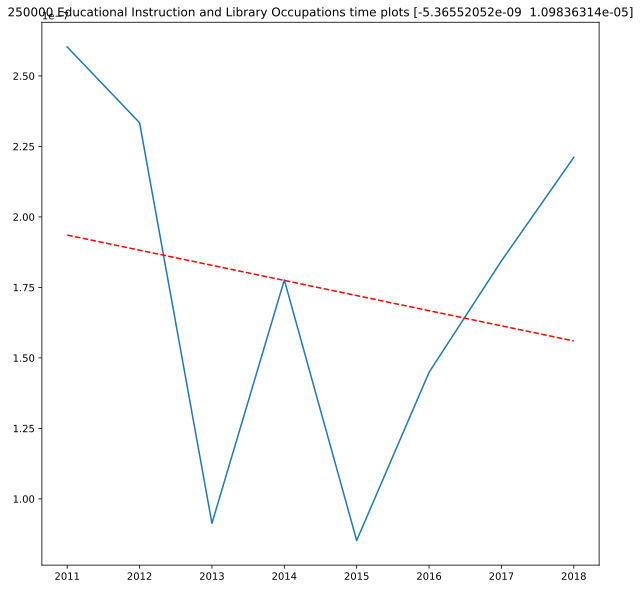

../PLOTS/./F_SUBAVG_RACE/F_R_2018_270000_Arts_Design_Entertainment_Sports_and_Media_Occupations_time_plots_.png


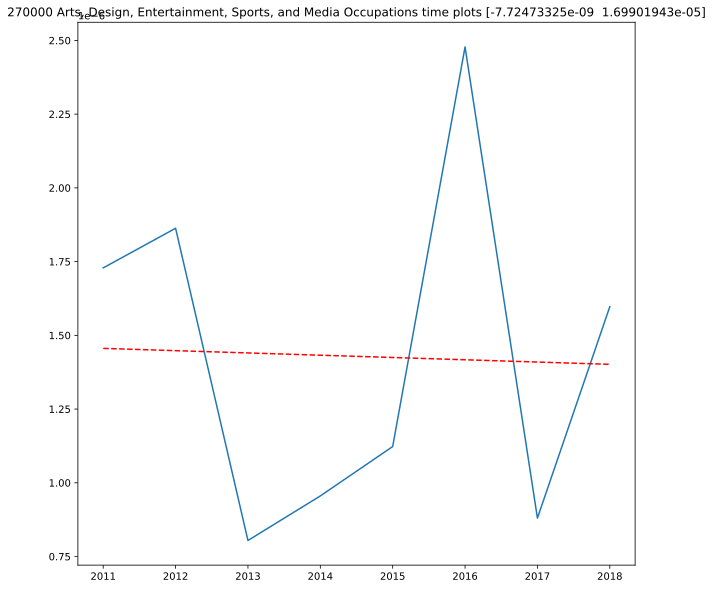

../PLOTS/./F_SUBAVG_RACE/F_R_2018_290000_Healthcare_Practitioners_and_Technical_Occupations_time_plots_.png


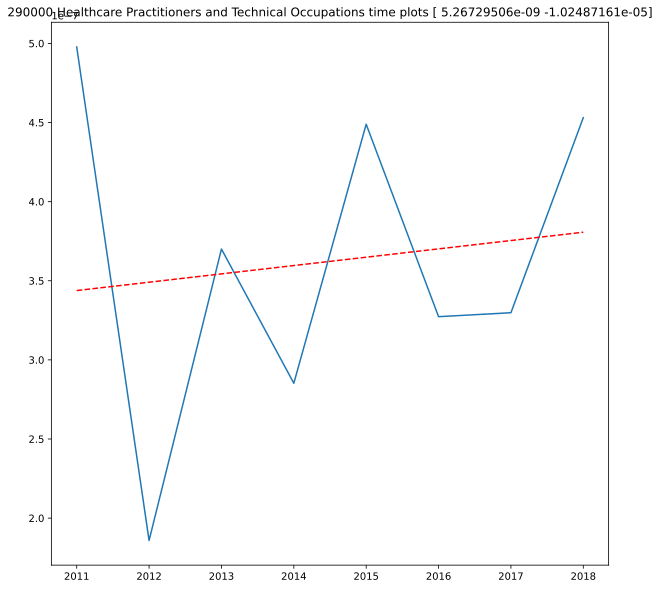

../PLOTS/./F_SUBAVG_RACE/F_R_2018_310000_Healthcare_Support_Occupations_time_plots_.png


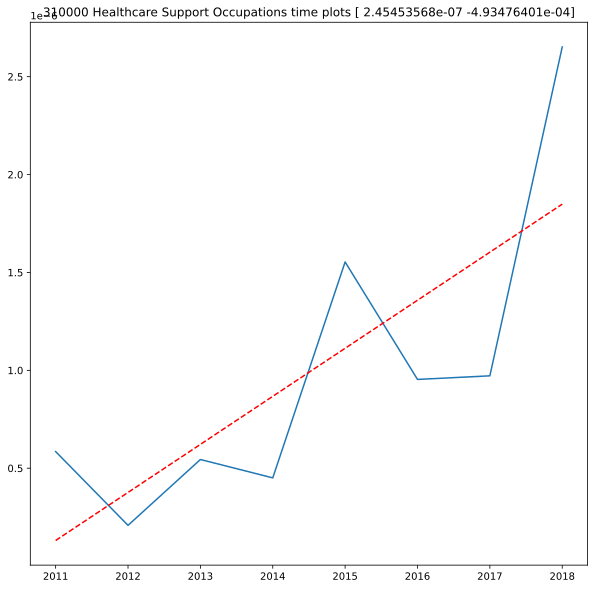

../PLOTS/./F_SUBAVG_RACE/F_R_2018_330000_Protective_Service_Occupations_time_plots_.png


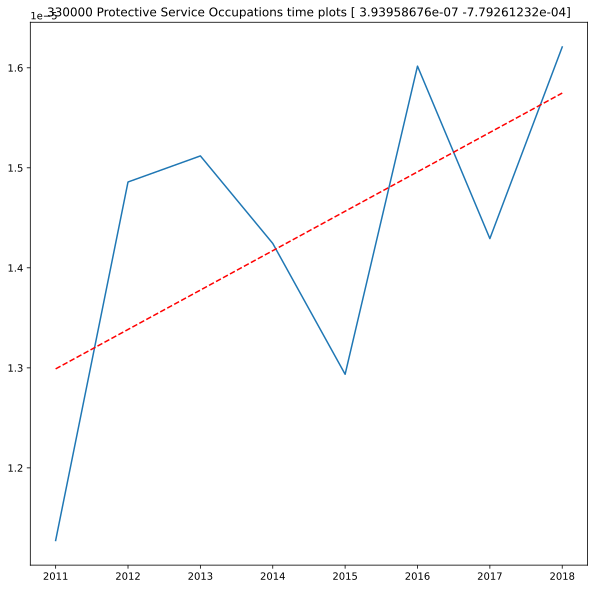

../PLOTS/./F_SUBAVG_RACE/F_R_2018_350000_Food_Preparation_and_Serving_Related_Occupations_time_plots_.png


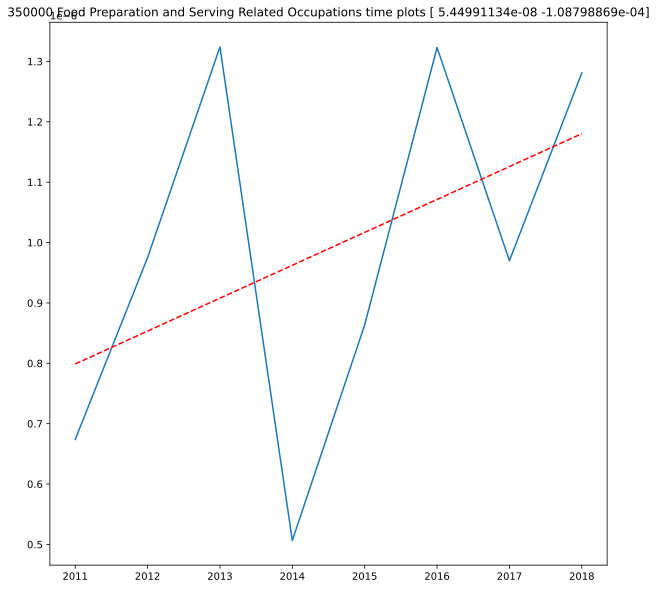

../PLOTS/./F_SUBAVG_RACE/F_R_2018_370000_Building_and_Grounds_Cleaning_and_Maintenance_Occupations_time_plots_.png


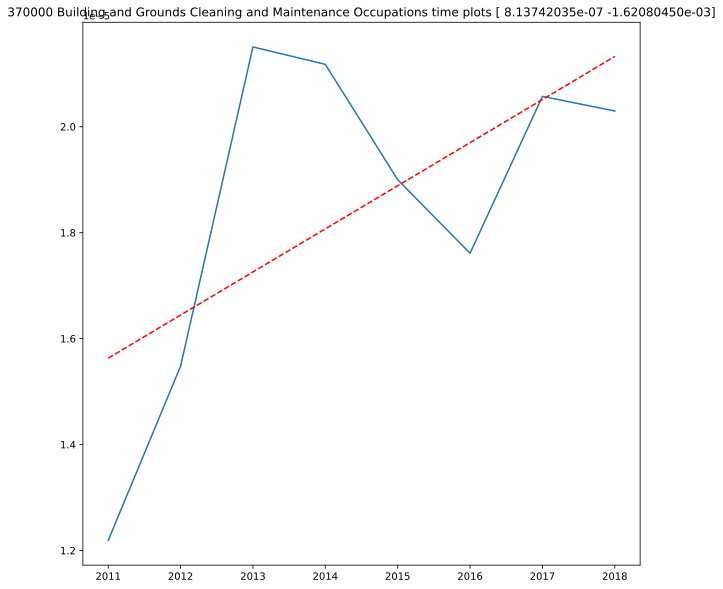

../PLOTS/./F_SUBAVG_RACE/F_R_2018_390000_Personal_Care_and_Service_Occupations_time_plots_.png


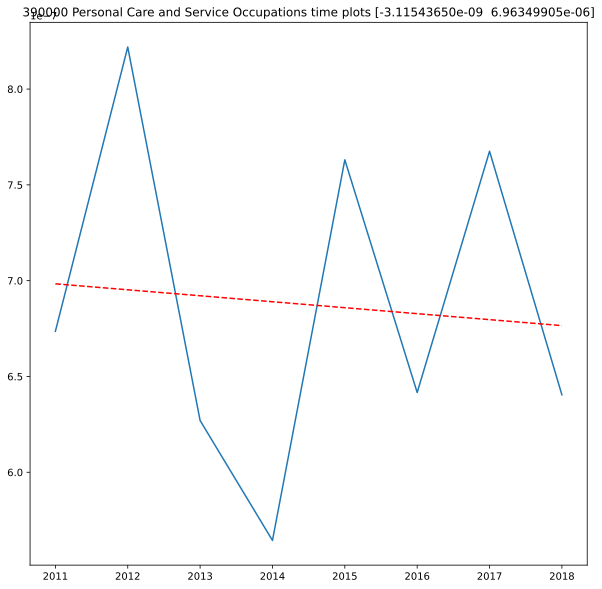

../PLOTS/./F_SUBAVG_RACE/F_R_2018_410000_Sales_and_Related_Occupations_time_plots_.png


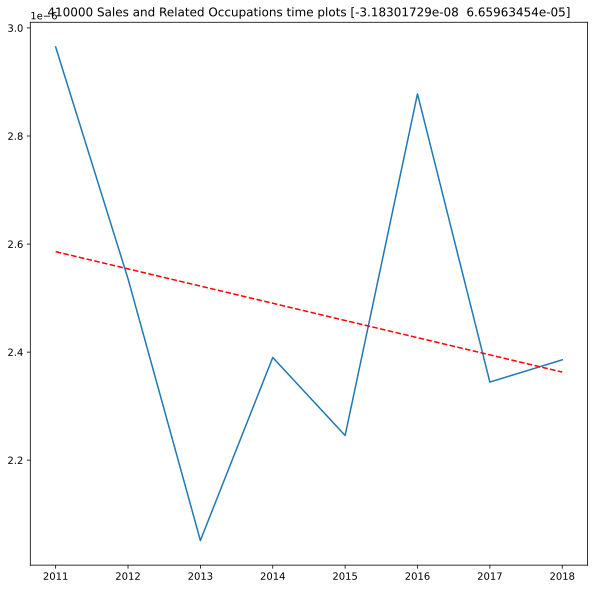

../PLOTS/./F_SUBAVG_RACE/F_R_2018_430000_Office_and_Administrative_Support_Occupations_time_plots_.png


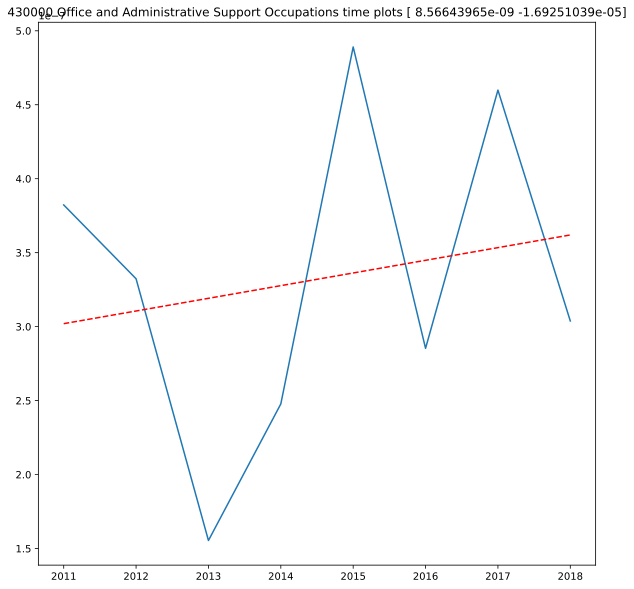

../PLOTS/./F_SUBAVG_RACE/F_R_2018_450000_Farming_Fishing_and_Forestry_Occupations_time_plots_.png


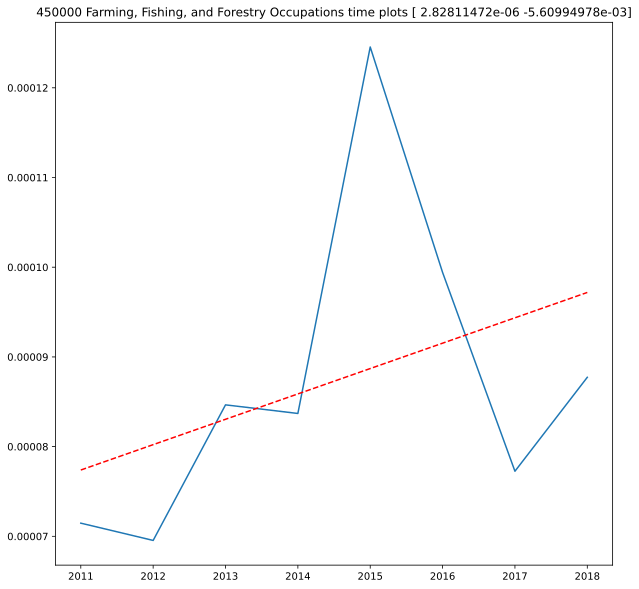

../PLOTS/./F_SUBAVG_RACE/F_R_2018_470000_Construction_and_Extraction_Occupations_time_plots_.png


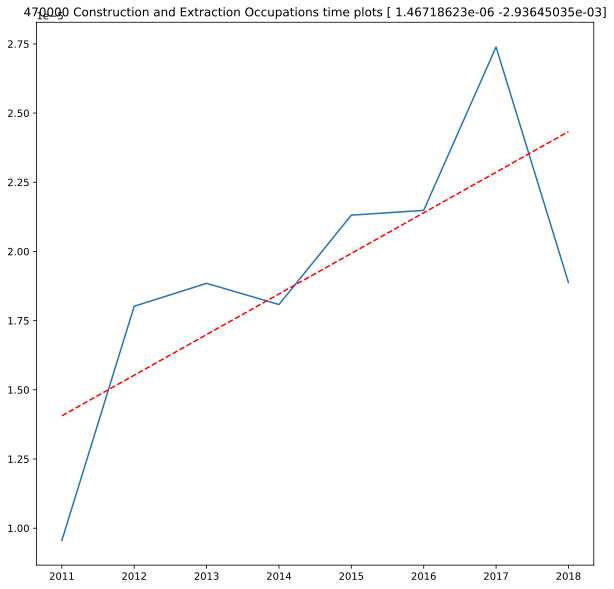

../PLOTS/./F_SUBAVG_RACE/F_R_2018_490000_Installation_Maintenance_and_Repair_Occupations_time_plots_.png


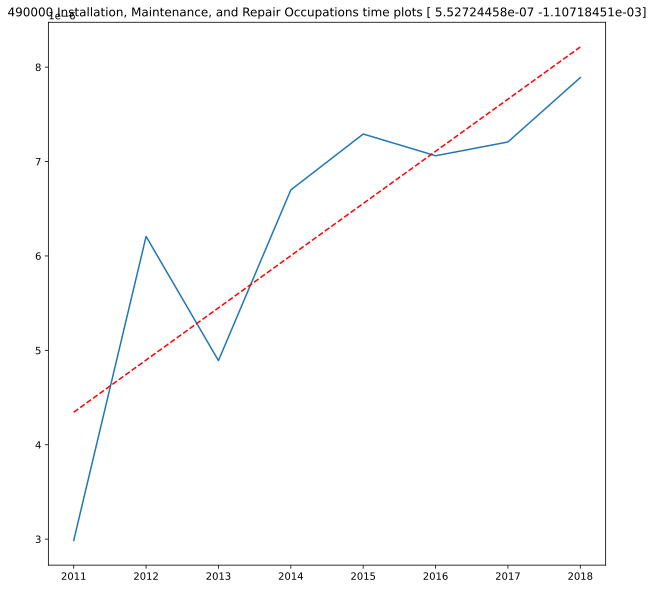

../PLOTS/./F_SUBAVG_RACE/F_R_2018_510000_Production_Occupations_time_plots_.png


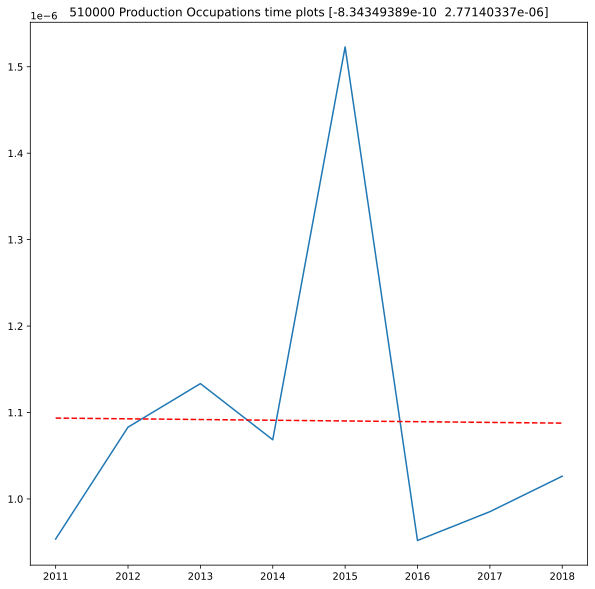

../PLOTS/./F_SUBAVG_RACE/F_R_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


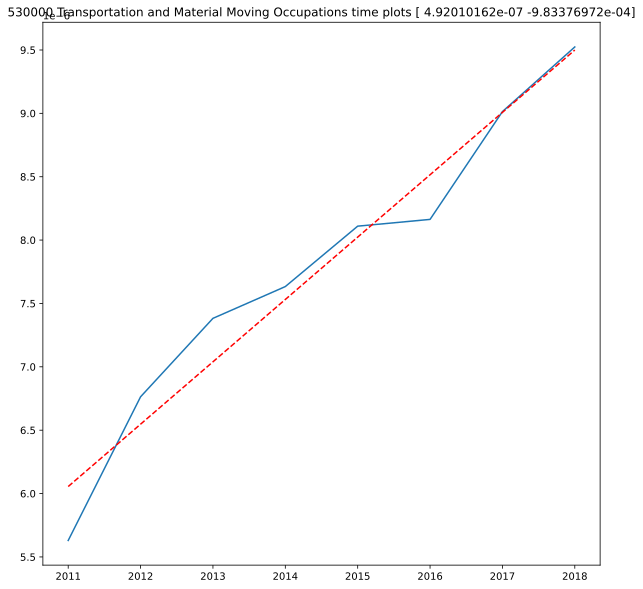

In [13]:
code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

#code_list =  ['_11', '_13' ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        
        if (len(tmp_lst) == 0):
            omean = 0.0
        else:
            omean = np.array(tmp_lst).mean()

        #print(year,occupation,omean)
        #print(" ")
 
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
 
    lines.append([use_case, popt])        
        
    #display(popt, pcov)
    
    for ri in range(0+2011,len(x)+2011):
        r.append(func(ri, *popt))
        #print(ri,r)
        
    plt.figure(figsize=(10, 10))
    
    plt.plot(x,y)
    plt.plot(x,r, 'r--')
    
    title = " time plots "
    
    plt.title(use_case + title + str(popt))    
    
    save_title = "../PLOTS/" + desired_file_output + use_case + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    print(save_title)
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    #plt.close()


In [14]:
for i in range(0,len(lines)):
    print(" y = {0: 1.8f} x + {1: 1.8f}  : {2} ".format(lines[i][1][0], lines[i][1][1], lines[i][0]))
    

 y =  0.00000000 x +  0.00000081  : 110000 Management Occupations 
 y =  0.00000002 x + -0.00003684  : 130000 Business and Financial Operations Occupations 
 y =  0.00000003 x + -0.00005946  : 150000 Computer and Mathematical Occupations 
 y = -0.00000003 x +  0.00007089  : 170000 Architecture and Engineering Occupations 
 y = -0.00000007 x +  0.00014339  : 190000 Life, Physical, and Social Science Occupations 
 y = -0.00000013 x +  0.00027089  : 210000 Community and Social Service Occupations 
 y =  0.00000007 x + -0.00014211  : 230000 Legal Occupations 
 y = -0.00000001 x +  0.00001098  : 250000 Educational Instruction and Library Occupations 
 y = -0.00000001 x +  0.00001699  : 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
 y =  0.00000001 x + -0.00001025  : 290000 Healthcare Practitioners and Technical Occupations 
 y =  0.00000025 x + -0.00049348  : 310000 Healthcare Support Occupations 
 y =  0.00000039 x + -0.00077926  : 330000 Protective Service Occupations

# CALC COV 

In [15]:
cov_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)

print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [16]:
# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]

for i in range(0,len(code_list)):
       
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0

        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        

    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    
    if (math.isnan(omean)):
        ocov = 0.0
    else:
        ostd  = np.array(y).std()
        ocov  = ostd/omean
        
    #ocov.append(str(use_case),ocov)
    print("***",use_case,ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])
    else:
        print("########ERROR#######")
       

*** 110000 Management Occupations 0.09147624001353633
*** 130000 Business and Financial Operations Occupations 0.2841275040650729
*** 150000 Computer and Mathematical Occupations 0.9975487514289294
*** 170000 Architecture and Engineering Occupations 0.2856463115610537
*** 190000 Life, Physical, and Social Science Occupations 0.4701544801040796
*** 210000 Community and Social Service Occupations 0.6694426251341655
*** 230000 Legal Occupations 0.19854707710489178
*** 250000 Educational Instruction and Library Occupations 0.3436859958359351
*** 270000 Arts, Design, Entertainment, Sports, and Media Occupations 0.378306772411601
*** 290000 Healthcare Practitioners and Technical Occupations 0.20258188681924266
*** 310000 Healthcare Support Occupations 0.7108416178491289
*** 330000 Protective Service Occupations 0.08294700755226259
*** 350000 Food Preparation and Serving Related Occupations 0.27050540713898846
*** 370000 Building and Grounds Cleaning and Maintenance Occupations 0.098575769126

In [17]:
print(cov_array)

[['110000 Management Occupations', 0.09147624001353633], ['130000 Business and Financial Operations Occupations', 0.2841275040650729], ['150000 Computer and Mathematical Occupations', 0.9975487514289294], ['170000 Architecture and Engineering Occupations', 0.2856463115610537], ['190000 Life, Physical, and Social Science Occupations', 0.4701544801040796], ['210000 Community and Social Service Occupations', 0.6694426251341655], ['230000 Legal Occupations', 0.19854707710489178], ['250000 Educational Instruction and Library Occupations', 0.3436859958359351], ['270000 Arts, Design, Entertainment, Sports, and Media Occupations', 0.378306772411601], ['290000 Healthcare Practitioners and Technical Occupations', 0.20258188681924266], ['310000 Healthcare Support Occupations', 0.7108416178491289], ['330000 Protective Service Occupations', 0.08294700755226259], ['350000 Food Preparation and Serving Related Occupations', 0.27050540713898846], ['370000 Building and Grounds Cleaning and Maintenance O

In [18]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0829470 	 330000 Protective Service Occupations 
0.0914762 	 110000 Management Occupations 
0.0985758 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0986920 	 410000 Sales and Related Occupations 
0.1051796 	 530000 Transportation and Material Moving Occupations 
0.1189661 	 390000 Personal Care and Service Occupations 
0.1522371 	 490000 Installation, Maintenance, and Repair Occupations 
0.1596418 	 510000 Production Occupations 
0.1598568 	 470000 Construction and Extraction Occupations 
0.1781958 	 450000 Farming, Fishing, and Forestry Occupations 
0.1985471 	 230000 Legal Occupations 
0.2025819 	 290000 Healthcare Practitioners and Technical Occupations 
0.2705054 	 350000 Food Preparation and Serving Related Occupations 
0.2841275 	 130000 Business and Financial Operations Occupations 
0.2856463 	 170000 Architecture and Engineering Occupations 
0.3100980 	 430000 Office and Administrative Support Occupations 
0.3436860 	 250000 Educational Instruction and

# MEAN

In [19]:
mean_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #if (ocup.find("_25") >= 0) and (case2.find(ocup) >=0) :
            #    print(global_y_soc1[j])
            #    print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0) and ( (str(global_y_soc1[j]).find("White") >= 0) or (str(global_y_soc1[j]).find("Black") >= 0) or (str(global_y_soc1[j]).find("Asian") >= 0) or (str(global_y_soc1[j]).find("Hispanic") >= 0) ):
                
                #print(global_y_soc1[j])
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                
                #if (ocup.find("_25") >= 0):
                #    print(global_y_soc1[j])
                #    print(case1, case2,ocup)
                #    print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0
        
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    #ostd  = np.array(y).std()
    #ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case,omean)
    
    if (omean >= 0):
        mean_array.append([str(use_case),omean])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
110000 Management Occupations 1.4592192353342394e-06
130000 Business and Financial Operations Occupations 3.850184429648564e-07
150000 Computer and Mathematical Occupations 2.4399246180226105e-07
170000 Architecture and Engineering Occupations 7.742824449765885e-07
190000 Life, Physical, and Social Science Occupations 7.043437140350277e-07
210000 Community and Social Service Occupations 1.7237258427843437e-06
230000 Legal Occupations 3.190406262013965e-06
250000 Educational Instruction and Library Occupations 2.21547775895602e-07
270000 Arts, Design, Entertainment, Sports, and Media Occupations 1.9723560349243445e-06
290000 Healthcare Practitioners and Technical Occupations 3.865982146123954e-07
310000 Healthcare Support Occupations 1.259246628363678e-06
330000 Protective Service Occupations 2.3522446332621185e-05
350000 Food Prepara

In [20]:
#print(global_y_soc1[40])

In [21]:
test_list = mean_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    
    
    
# create sorted order index list
sorted_order = []
for i in range(0,len(test_list)):
    idx = str(test_list[i][0]).split(" ")[0][0:2]
    nidx = int( (int(idx) - 11) / 2 )
    sorted_order.append(nidx)
    
print(sorted_order)

0.0000002 	 250000 Educational Instruction and Library Occupations 
0.0000002 	 150000 Computer and Mathematical Occupations 
0.0000004 	 130000 Business and Financial Operations Occupations 
0.0000004 	 290000 Healthcare Practitioners and Technical Occupations 
0.0000006 	 430000 Office and Administrative Support Occupations 
0.0000007 	 190000 Life, Physical, and Social Science Occupations 
0.0000008 	 170000 Architecture and Engineering Occupations 
0.0000009 	 390000 Personal Care and Service Occupations 
0.0000013 	 310000 Healthcare Support Occupations 
0.0000015 	 110000 Management Occupations 
0.0000015 	 350000 Food Preparation and Serving Related Occupations 
0.0000017 	 510000 Production Occupations 
0.0000017 	 210000 Community and Social Service Occupations 
0.0000020 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0000032 	 230000 Legal Occupations 
0.0000036 	 410000 Sales and Related Occupations 
0.0000104 	 490000 Installation, Maintenance, and R

# COV LEVEL 3

In [22]:
code_list = []
soc_level = 3

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-5 + soc_level]
    #print(ocup)
    if ocup not in code_list:
        if (str(ocup[1:]).isnumeric()):
            code_list.append(ocup)
        
print(code_list)

['_1110', '_1120', '_1130', '_1131', '_1190', '_1191', '_1310', '_1311', '_1320', '_1511', '_1512', '_1520', '_1710', '_1720', '_1721', '_1730', '_1910', '_1930', '_1920', '_1940', '_2110', '_2120', '_2310', '_2320', '_2510', '_2511', '_2520', '_2530', '_2540', '_2590', '_2710', '_2720', '_2730', '_2740', '_2910', '_2911', '_2920', '_2990', '_3110', '_3111', '_3190', '_3120', '_3310', '_3320', '_3330', '_3390', '_3510', '_3520', '_3530', '_3590', '_3710', '_3720', '_3730', '_3910', '_3920', '_3930', '_3940', '_3950', '_3970', '_3990', '_4110', '_4120', '_4130', '_4140', '_4190', '_4310', '_4330', '_4340', '_4341', '_4350', '_4360', '_4390', '_4351', '_4510', '_4520', '_4530', '_4540', '_4710', '_4720', '_4721', '_4722', '_4730', '_4740', '_4750', '_4910', '_4920', '_4930', '_4990', '_5110', '_5120', '_5130', '_5140', '_5141', '_5151', '_5160', '_5170', '_5180', '_5190', '_5191', '_5310', '_5320', '_5330', '_5340', '_5350', '_5360', '_5370', '_5371']


In [23]:
cov_array = []

lines     = []

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]

soc_level = 3

for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
            
            year  = str(yr)
            case1 = global_y_soc1[j][0].split("-")[0][0:4]
            case2 = global_y_soc1[j][0].split("-")[0][-7:]
            
            #print(case1, case2,ocup)
        
            if (case1.find(year) >= 0) and (case2.find(ocup) >=0):
                
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        
        if (math.isnan(omean)):
            omean = 0.0
        
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    
    if (omean > 0.0):
        ocov  = ostd/omean 
        #ocov.append(str(use_case),ocov)
    else:
        ocov = 0.0
    
    print(use_case, ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])

110000 Management Occupations 0.500775709950595
110000 Management Occupations 0.3007146441095425
110000 Management Occupations 0.19852671943581449
110000 Management Occupations 1.9127097296251854
110000 Management Occupations 0.13855521446380673
110000 Management Occupations 0.5347822052341351
130000 Business and Financial Operations Occupations 0.37847800195938297
130000 Business and Financial Operations Occupations 0.7412958576223745
130000 Business and Financial Operations Occupations 0.6065987861136919
150000 Computer and Mathematical Occupations 1.0580675304138238
150000 Computer and Mathematical Occupations 0.0
150000 Computer and Mathematical Occupations 1.2909944487358056
170000 Architecture and Engineering Occupations 0.5537174943348735
170000 Architecture and Engineering Occupations 0.5660947378794734
170000 Architecture and Engineering Occupations 0.48717380562776774
170000 Architecture and Engineering Occupations 0.9785774499459475
190000 Life, Physical, and Social Science 

In [24]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0000000 	 150000 Computer and Mathematical Occupations 
0.0000000 	 310000 Healthcare Support Occupations 
0.1114321 	 530000 Transportation and Material Moving Occupations 
0.1125179 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.1385552 	 110000 Management Occupations 
0.1397720 	 530000 Transportation and Material Moving Occupations 
0.1451353 	 530000 Transportation and Material Moving Occupations 
0.1527031 	 490000 Installation, Maintenance, and Repair Occupations 
0.1601850 	 410000 Sales and Related Occupations 
0.1692083 	 330000 Protective Service Occupations 
0.1762359 	 470000 Construction and Extraction Occupations 
0.1768086 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.1786039 	 330000 Protective Service Occupations 
0.1801971 	 470000 Construction and Extraction Occupations 
0.1979760 	 450000 Farming, Fishing, and Forestry Occupations 
0.1985267 	 110000 Management Occupations 
0.2015405 	 510000 Production Occupations 


# VARIANCE ACROSS 

In [25]:
def get_case_list(soc_level, desired_case):
    code_list = []

    #soc_level = 1
    #desired_case = "16to19"

    global global_y_soc1
    
    for i in range(0,len(global_y_soc1)):
        ucase = str(global_y_soc1[i][0]).split('-')[0]
        #print(ucase)
        
        if (ucase.find("NO DATA FOUND") < 0):
            ocup    = "_" + desired_case + "_" + ucase[-6:-5 + soc_level]
            #print(ocup)
            if ocup not in code_list:
                code_list.append(ocup)
                #if (str(ocup[1:]).isnumeric()):
                #    code_list.append(ocup)
        
    #print(code_list)
    
    return(code_list)

In [26]:
#soc_level = 1
#desired_case = "16to19"
#
#get_case_list(soc_level, desired_case)

In [69]:
#print(sorted_order)
print(swivel_order)

[2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 13, 19, 11, 18, 21, 17]


In [76]:
cases = ["White", "Black", "Asian", "Hispanic" ]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)
    
    #print(code_list)

    cov_array = []
 
    #for i in range(0,len(code_list)):
    for i in swivel_order:
    #for i in sorted_order:
    
        use_case = str(soc_new_code[i+1][0][0:2]) + "0000" + " " + str(soc_new_code[i+1][1]) 
       
        ocup    = str(code_list[i])
    
        x = []
        y = []

        #print(ocup)
        
        for yr in range(2011,2019):
        
            tmp_lst = []
            found   = 0
        
            for j in range(0,len(global_y_soc1)):
            
                year  = str(yr)
                case1 = global_y_soc1[j][0].split("-")[0][0:4]
                case2 = global_y_soc1[j][0].split("-")[0][-7:]
                case3 = global_y_soc1[j][0].split("-")[0][4:-7]
                
                #print(ocup,case1,case2,case3)
                #_White_15 2011 _111011 _F_RWT_White_total
        
        
                if  (case1.find(year) >= 0) and (case2.find(ocup[-3:]) >=0) and (case3.find(ocup[0:-3]) >= 0):
                
                    found = 1
                
                    #if("Asian" in desired_case):
                    #    print(case1, case2, case3, ocup)
                
                    tmp =  global_y_soc1[j][0].split('-')
                    
                    #print(tmp)
                    #stop()
                    
                    use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    #use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
                    
                    #print(tmp_lst)
      
      
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)

        
        #print(x,y)
                   
        omean = np.array(y).mean()
        ostd  = np.array(y).std()
        
        if (omean > 0.0):
            ocov  = ostd/omean 
        else:
            ocov = 0.0
    
        if math.isnan(ocov):
            ocov = 0.0
            
        #print(ocup[-2:],desired_case,use_case,found)
        
        ocov_case = desired_case + " " + use_case
        
        #print(ocov_case)
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        cov_array.append([str(ocov_case),ocov])
        
    mult_array.append([str(desired_case),cov_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(cov_array)):
        print("{0:1.7f} \t {1:} ".format(cov_array[i][1], str(cov_array[i][0]))) 

    print(" ")

1.0132456 	 White 150000 Computer and Mathematical Occupations 
0.4410880 	 White 130000 Business and Financial Operations Occupations 
0.3700791 	 White 250000 Educational Instruction and Library Occupations 
0.4039795 	 White 170000 Architecture and Engineering Occupations 
0.1603748 	 White 430000 Office and Administrative Support Occupations 
0.2894925 	 White 230000 Legal Occupations 
0.2659551 	 White 350000 Food Preparation and Serving Related Occupations 
0.1760531 	 White 290000 Healthcare Practitioners and Technical Occupations 
0.5171505 	 White 310000 Healthcare Support Occupations 
1.2247449 	 White 190000 Life, Physical, and Social Science Occupations 
0.3469388 	 White 210000 Community and Social Service Occupations 
0.0668468 	 White 410000 Sales and Related Occupations 
0.1702347 	 White 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.2174591 	 White 390000 Personal Care and Service Occupations 
0.1384149 	 White 510000 Production Occupations 
0.10

In [77]:
print(mult_array[2][1])

[['Asian 150000 Computer and Mathematical Occupations', 0.0], ['Asian 130000 Business and Financial Operations Occupations', 1.7320508075688772], ['Asian 250000 Educational Instruction and Library Occupations', 0.0], ['Asian 170000 Architecture and Engineering Occupations', 0.0], ['Asian 430000 Office and Administrative Support Occupations', 0.0], ['Asian 230000 Legal Occupations', 0.0], ['Asian 350000 Food Preparation and Serving Related Occupations', 2.0], ['Asian 290000 Healthcare Practitioners and Technical Occupations', 1.7320508075688774], ['Asian 310000 Healthcare Support Occupations', 0.0], ['Asian 190000 Life, Physical, and Social Science Occupations', 2.6457513110645907], ['Asian 210000 Community and Social Service Occupations', 2.6457513110645903], ['Asian 410000 Sales and Related Occupations', 0.15912978071241066], ['Asian 270000 Arts, Design, Entertainment, Sports, and Media Occupations', 0.0], ['Asian 390000 Personal Care and Service Occupations', 2.6457513110645907], ['A

../PLOTS/./F_SUBAVG_RACE/F_R_2018_Coef_by_RACE.png


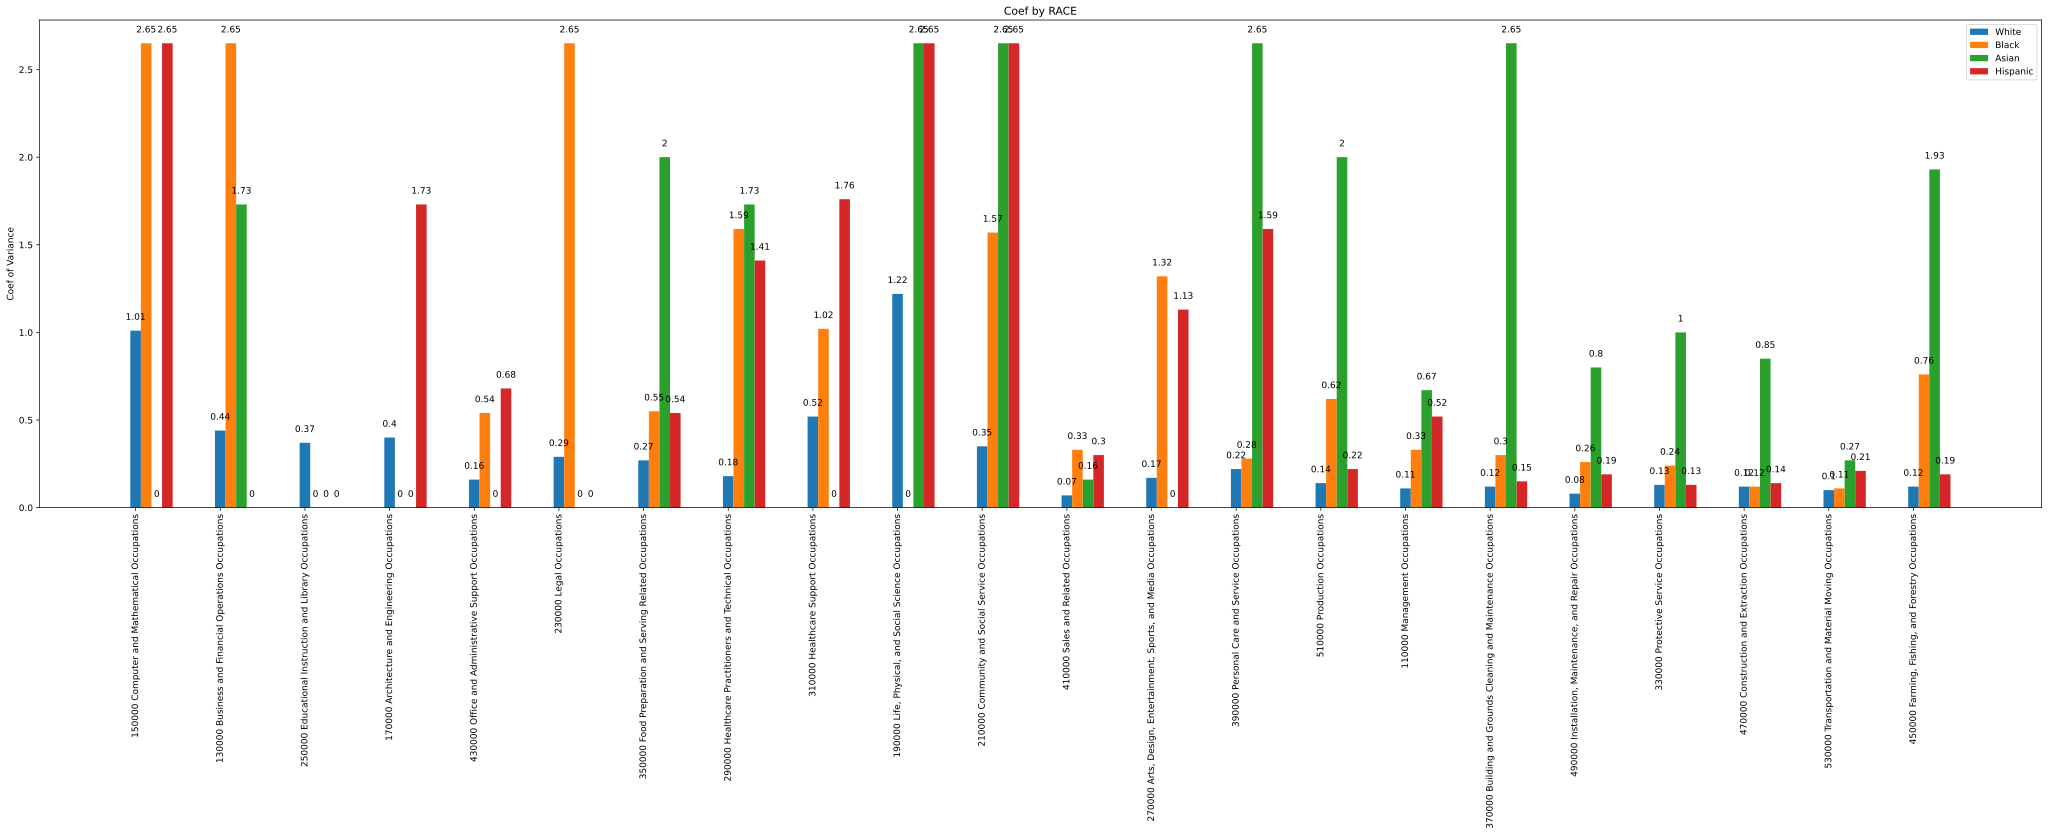

In [79]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
            
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)
        
#print(labels)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        val = round(val,2)
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(40, 10))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)
    
    
# Add bar for relative population size
#total_ocup = np.array(total_male) + np.array(total_female)
#pop_scaled = np.array(grpd).max() / total_ocup[0:-1].max() * total_ocup
#i=i+1
#tmp_rect = ax.bar(x+i*(width/2), pop_scaled[0:-1], width/2, label='Population')
#rects.append(tmp_rect)


title = "Coef by RACE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coef of Variance')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()
    


# MEAN

In [80]:
cases = ["White", "Black", "Asian", "Hispanic" ]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    mean_array = []

    #for i in range(0,len(code_list)):
    for i in swivel_order:
    #for i in sorted_order:
    
        use_case = str(soc_new_code[i+1][0][0:2]) + "0000" + " " + str(soc_new_code[i+1][1]) 
    
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
            
                year  = str(yr)
                case1 = global_y_soc1[j][0].split("-")[0][0:4]
                case2 = global_y_soc1[j][0].split("-")[0][-7:]
                case3 = global_y_soc1[j][0].split("-")[0][4:-7]
        
                if  (case1.find(year) >= 0) and (case2.find(ocup[-3:]) >=0) and (case3.find(ocup[0:-3]) >= 0):
                
                    #print(case1, case2, case3, ocup)
                
                    tmp =  global_y_soc1[j][0].split('-')
                    
                    #print(tmp)
                    #stop()
                    
                    use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    #use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        #ostd  = np.array(y).std()
        #ocov  = ostd/omean 
    
        if math.isnan(omean):
            ocov = 0.0
        
        omean_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        mean_array.append([str(omean_case),omean])
        
    mult_array.append([str(desired_case),mean_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(mean_array)):
        print("{0:1.7f} \t {1:} ".format(mean_array[i][1], str(mean_array[i][0]))) 

    print(" ")

0.0000003 	 White 150000 Computer and Mathematical Occupations 
0.0000004 	 White 130000 Business and Financial Operations Occupations 
0.0000002 	 White 250000 Educational Instruction and Library Occupations 
0.0000010 	 White 170000 Architecture and Engineering Occupations 
0.0000003 	 White 430000 Office and Administrative Support Occupations 
0.0000053 	 White 230000 Legal Occupations 
0.0000008 	 White 350000 Food Preparation and Serving Related Occupations 
0.0000006 	 White 290000 Healthcare Practitioners and Technical Occupations 
0.0000010 	 White 310000 Healthcare Support Occupations 
0.0000008 	 White 190000 Life, Physical, and Social Science Occupations 
0.0000021 	 White 210000 Community and Social Service Occupations 
0.0000012 	 White 410000 Sales and Related Occupations 
0.0000016 	 White 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0000008 	 White 390000 Personal Care and Service Occupations 
0.0000009 	 White 510000 Production Occupations 
0.00

In [81]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)
              
for i in range(0,len(labels)):
    print(labels[i])

 150000 Computer and Mathematical Occupations
 130000 Business and Financial Operations Occupations
 250000 Educational Instruction and Library Occupations
 170000 Architecture and Engineering Occupations
 430000 Office and Administrative Support Occupations
 230000 Legal Occupations
 350000 Food Preparation and Serving Related Occupations
 290000 Healthcare Practitioners and Technical Occupations
 310000 Healthcare Support Occupations
 190000 Life, Physical, and Social Science Occupations
 210000 Community and Social Service Occupations
 410000 Sales and Related Occupations
 270000 Arts, Design, Entertainment, Sports, and Media Occupations
 390000 Personal Care and Service Occupations
 510000 Production Occupations
 110000 Management Occupations
 370000 Building and Grounds Cleaning and Maintenance Occupations
 490000 Installation, Maintenance, and Repair Occupations
 330000 Protective Service Occupations
 470000 Construction and Extraction Occupations
 530000 Transportation and Mater

4
22
../PLOTS/./F_SUBAVG_RACE/F_R_2018_Mean_Fatality_per_1000000_by_RACE.png


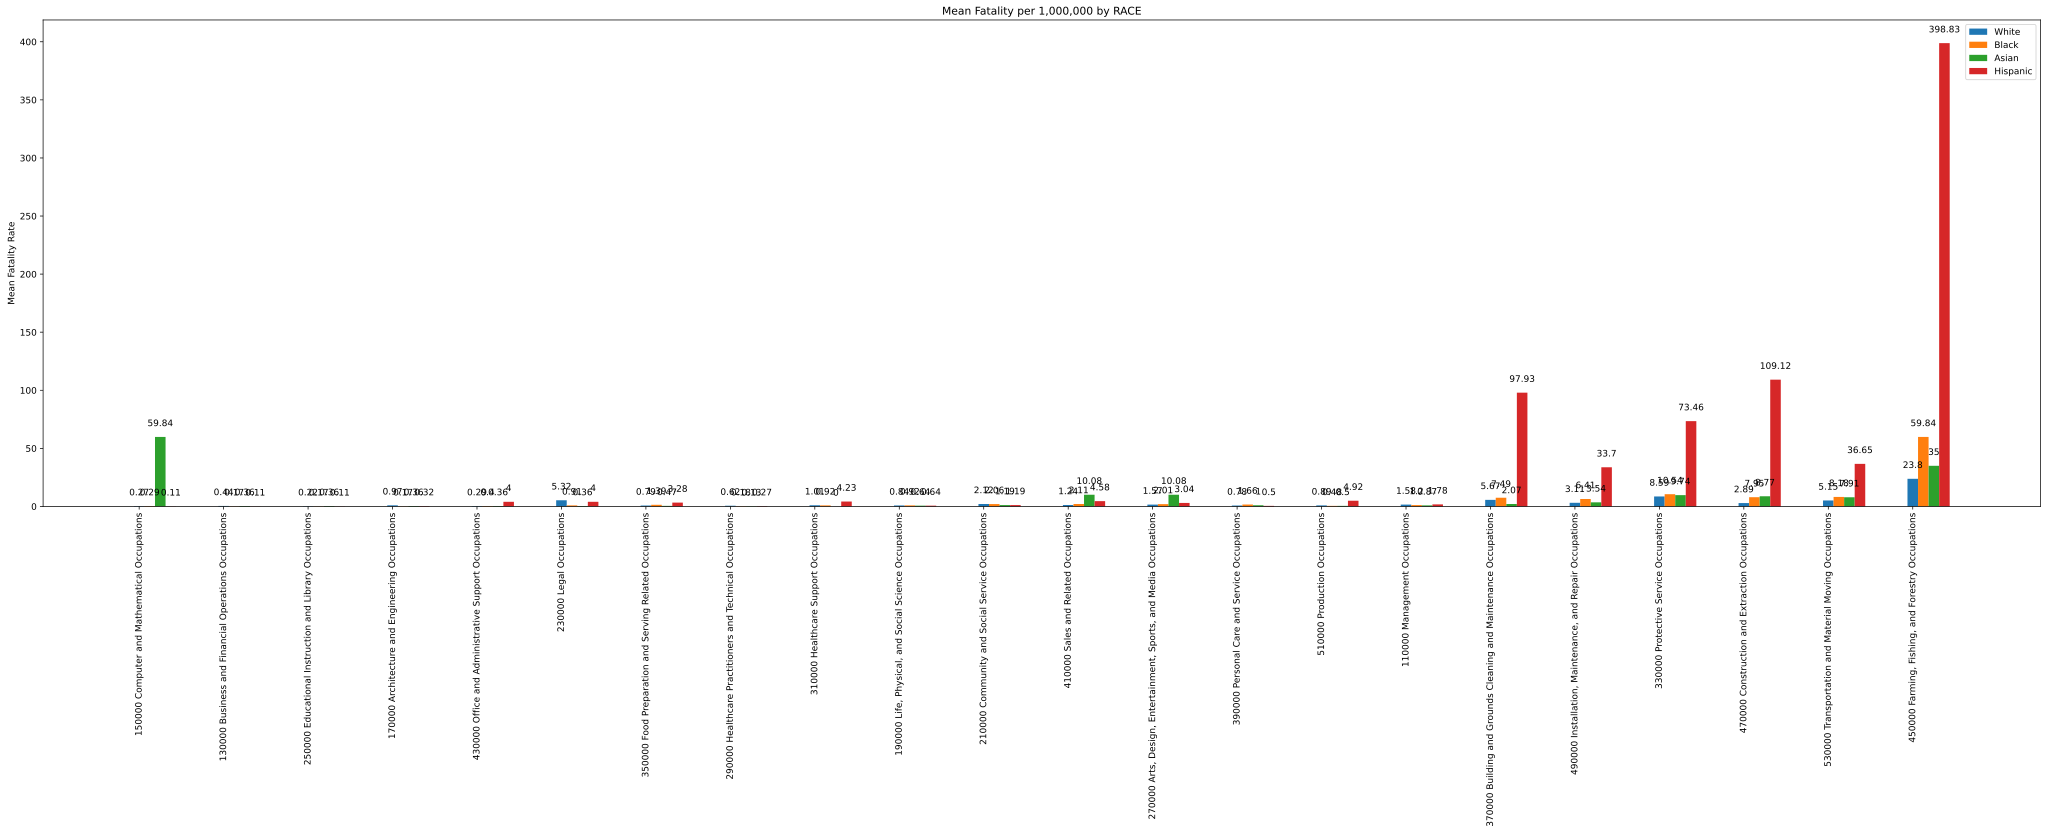

In [82]:
           
groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        
        val = round(1000000*val,2)
        
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(40, 10))

print(len(grpd))
print(len(grpd[0]))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width/2), grpd[i], width/2, label=grpl[i])
    rects.append(tmp_rect)
    
    
# Add bar for relative population size
#total_ocup = np.array(total_male) + np.array(total_female)
#pop_scaled = np.array(grpd).max() / total_ocup[0:-1].max() * total_ocup
#i=i+1
#tmp_rect = ax.bar(x+i*(width/2), pop_scaled[0:-1], width/2, label='Population')
#rects.append(tmp_rect)

    
title = "Mean Fatality per 1,000,000 by RACE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Fatality Rate')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 100)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()

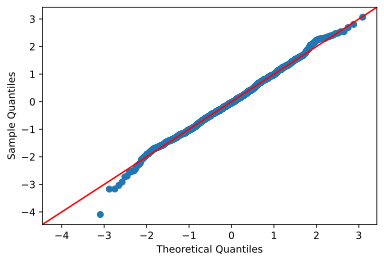

In [34]:
# Sample QQ plot

import statsmodels.api as sm
from scipy.stats import norm
import pylab

my_data = norm.rvs(size=1000)
sm.qqplot(my_data, line='45')
pylab.show()


In [35]:
# Restructure data for QQ analysis

[0.0, 0.0, 0.0, 0.01, 0.0, 0.05, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.02, 0.01, 0.01, 0.02, 0.06, 0.03, 0.09, 0.03, 0.05, 0.24]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.0, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.0, 0.01, 0.07, 0.06, 0.11, 0.08, 0.08, 0.6]
[0.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.1, 0.1, 0.01, 0.0, 0.01, 0.02, 0.04, 0.1, 0.09, 0.08, 0.35]
[0.0, 0.0, 0.0, 0.0, 0.04, 0.04, 0.03, 0.0, 0.04, 0.01, 0.01, 0.05, 0.03, 0.01, 0.05, 0.02, 0.98, 0.34, 0.73, 1.09, 0.37, 3.99]
22
0  150000 Computer and Mathematical Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_150000.png


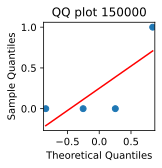

/tmp/ipykernel_653768/729077852.py:47: RuntimeWarning: invalid value encountered in true_divide
  tscale = np.array(tmp_list) / tmax


1  130000 Business and Financial Operations Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_130000.png


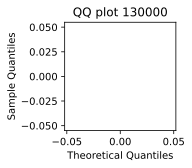

/tmp/ipykernel_653768/729077852.py:47: RuntimeWarning: invalid value encountered in true_divide
  tscale = np.array(tmp_list) / tmax


2  250000 Educational Instruction and Library Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_250000.png


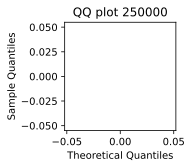

3  170000 Architecture and Engineering Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_170000.png


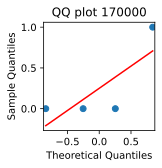

4  430000 Office and Administrative Support Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_430000.png


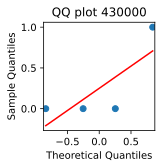

5  230000 Legal Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_230000.png


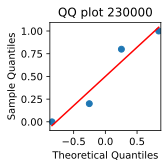

6  350000 Food Preparation and Serving Related Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_350000.png


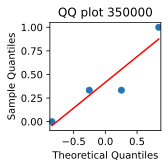

7  290000 Healthcare Practitioners and Technical Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_290000.png


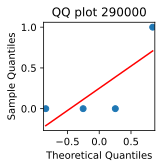

8  310000 Healthcare Support Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_310000.png


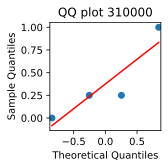

9  190000 Life, Physical, and Social Science Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_190000.png


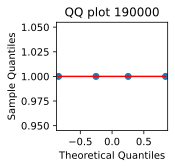

10  210000 Community and Social Service Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_210000.png


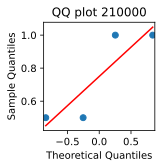

11  410000 Sales and Related Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_410000.png


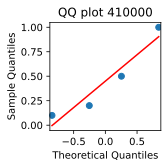

12  270000 Arts, Design, Entertainment, Sports, and Media Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_270000.png


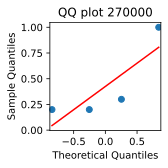

13  390000 Personal Care and Service Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_390000.png


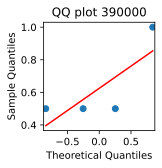

14  510000 Production Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_510000.png


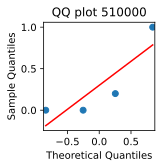

15  110000 Management Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_110000.png


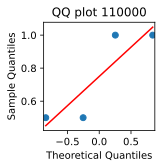

16  370000 Building and Grounds Cleaning and Maintenance Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_370000.png


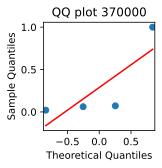

17  490000 Installation, Maintenance, and Repair Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_490000.png


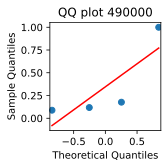

18  330000 Protective Service Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_330000.png


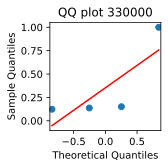

19  470000 Construction and Extraction Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_470000.png


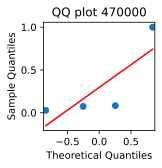

20  530000 Transportation and Material Moving Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_530000.png


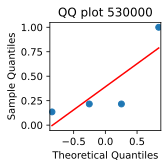

21  450000 Farming, Fishing, and Forestry Occupations
../PLOTS/./F_SUBAVG_RACE/F_R_2018_QQ_plot_450000.png


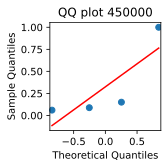

In [36]:
labels = []

for a in range(0,len(mult_array)):

    for i in range(0,len(mult_array[a][1])):
        line = mult_array[a][1][i]
        larr = str(line[0]).split(" ")
        lbl  = ""
        #print(larr)
        for j in range(0,len(larr[1:])):
            new_lbl = str(larr[1+j])
            lbl = lbl + " " + new_lbl
        #print(lbl)

        if lbl not in labels:
            labels.append(lbl)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        
        val = round(10000*val,2)
        
        subgrp.append(val)

    print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
# Restructure
qq_data = []

print(len(grpd[1]))

for i in range(0,len(grpd[0])):
    tmp_list = []
    for j in range(0,len(grpd)):
        #print(grpd[j][i]," ",end="")
        tmp_list.append(grpd[j][i])
    #print(tmp_list)
    tmax = np.array(tmp_list).max()
    tscale = np.array(tmp_list) / tmax
    qq_data = qq_data + tscale.tolist()
    #print(tscale)
    
    #my_data = norm.rvs(size=22)
    my_data = tscale
    #print(my_data)
    fig, ax = plt.subplots(figsize=(2, 2))
    sm.qqplot(my_data, line='r', ax=ax)
    
    print(i,labels[i])
    
    title = "QQ plot "+str(labels[i]).split(" ")[1]
    ax.set_title(title)

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    print(save_title)
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    #pylab.show()
    plt.show()
    #plt.close()

In [37]:
print(labels)    
print(len(labels))    
for i in range(0,len(labels)):
    print(labels[i])

[' 150000 Computer and Mathematical Occupations', ' 130000 Business and Financial Operations Occupations', ' 250000 Educational Instruction and Library Occupations', ' 170000 Architecture and Engineering Occupations', ' 430000 Office and Administrative Support Occupations', ' 230000 Legal Occupations', ' 350000 Food Preparation and Serving Related Occupations', ' 290000 Healthcare Practitioners and Technical Occupations', ' 310000 Healthcare Support Occupations', ' 190000 Life, Physical, and Social Science Occupations', ' 210000 Community and Social Service Occupations', ' 410000 Sales and Related Occupations', ' 270000 Arts, Design, Entertainment, Sports, and Media Occupations', ' 390000 Personal Care and Service Occupations', ' 510000 Production Occupations', ' 110000 Management Occupations', ' 370000 Building and Grounds Cleaning and Maintenance Occupations', ' 490000 Installation, Maintenance, and Repair Occupations', ' 330000 Protective Service Occupations', ' 470000 Construction 